In [ ]:
from math import log
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import extractor as ext
import pandas as pd

# Nonlinear measures for dynamic system
# import nodls

In [ ]:
fbase = pd.read_csv('./1_filtered.csv', header=None)

In [1]:
extractor = ext.RecordExtractor()
cycles = extractor.read_sample(fbase)
len(cycles)

1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000
1280000


4

Implement feature extractors:

1. SampEn - Sample Entropy
2. RMS - Root Mean Square
3. WL - Waveform Length
4. WAMP - Willison Amplitude
5. ApEn - Approximate entropy
6. MAV - Mean Absolute Value

# SampEn

Sample entropy (SampEn) is a modification of approximate entropy (ApEn), used for assessing the complexity of physiological time-series signals, diagnosing diseased states. SampEn has two advantages over ApEn: data length independence and a relatively trouble-free implementation.

In [ ]:
def construct_templates(timeseries_data: list, m: int = 2):
    num_windows = len(timeseries_data) - m + 1
    return [timeseries_data[x: x + m] for x in range(0, num_windows)]


def get_matches(templates: list, r: float):
    return len(
        list(filter(lambda x: is_match(
            x[0], x[1], r), combinations(templates, 2)))
    )


def is_match(template_1: list, template_2: list, r: float):
    return all([abs(x - y) < r for (x, y) in zip(template_1, template_2)])


def sample_entropy(timeseries_data: list, window_size: int, r: float):
    B = get_matches(construct_templates(timeseries_data, window_size), r)
    A = get_matches(construct_templates(timeseries_data, window_size + 1), r)
    return -log(A / B)

In [2]:
fbase.head()

          0         1         2         3
0  8.456798 -4.466378  7.215951  0.019221
1  8.454815 -4.464132  7.212556  0.019295
2  8.453542 -4.461002  7.207107  0.019680
3  8.449433 -4.457170  7.201194  0.020556
4  8.440568 -4.453560  7.195996  0.020409

In [3]:
# Cycles 4 Sensors with 5 Cycles
cycle_01 = cycles[0][0]
print(cycle_01)
print(len(cycle_01.grip))
cycle_01.grip.info()

12000
<class 'pandas.core.series.Series'>
RangeIndex: 12000 entries, 108000 to 119999
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
12000 non-null  float64
dtypes: float64(1)
memory usage: 93.9 KB


In [4]:
c_01std = np.std(cycle_01.grip)
cycle_01.grip.head()

108000    0.037666
108001    0.012989
108002   -0.025789
108003   -0.062451
108004   -0.078099
Name: 0, dtype: float64

In [5]:
sample_entropy(cycle_01.grip, 0.5*extractor._freq,
               c_01std)  # How to use withou integer?

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[9], line 1
----> 1 sample_entropy(cycle_01.grip, 0.5*extractor._freq,
      2                c_01std)  # How to use withou integer?

Cell In[5], line 18, in sample_entropy(timeseries_data, window_size, r)
     17 def sample_entropy(timeseries_data: list, window_size: int, r: float):
---> 18     B = get_matches(construct_templates(timeseries_data, window_size), r)
     19     A = get_matches(construct_templates(timeseries_data, window_size + 1), r)
     20     return -log(A / B)

Cell In[5], line 3, in construct_templates(timeseries_data, m)
      1 def construct_templates(timeseries_data: list, m: int = 2):
      2     num_windows = len(timeseries_data) - m + 1
----> 3     return [timeseries_data[x: x + m] for x in range(0, num_windows)]

TypeError: 'float' object cannot be interpreted as an integer


# RMS - Root Mean Square 
Is the sum of all squared values, divided by the amount and made a square root
Also named as Effective Value

In [6]:
# Cycles 4 Sensors with 5 Cycles
cycle_01 = cycles[0][0]
print(cycle_01)
print(len(cycle_01.grip))
cycle_01.grip.info()

12000
<class 'pandas.core.series.Series'>
RangeIndex: 12000 entries, 108000 to 119999
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
12000 non-null  float64
dtypes: float64(1)
memory usage: 93.9 KB


In [ ]:
def rms(sample, window=200):
    return np.sqrt(np.mean(sample**2))

In [7]:
rms(cycle_01.grip)

0.023864513859219446

In [8]:
# Choose the range, or the window
rms(cycle_01.grip[:int(.2*extractor._freq)])

0.02493058423110956

[0.02493058423110956, 0.025201874107211978, 0.027130253427377897, 0.025025661738195662, 0.029781746217193476, 0.029781746217193476]


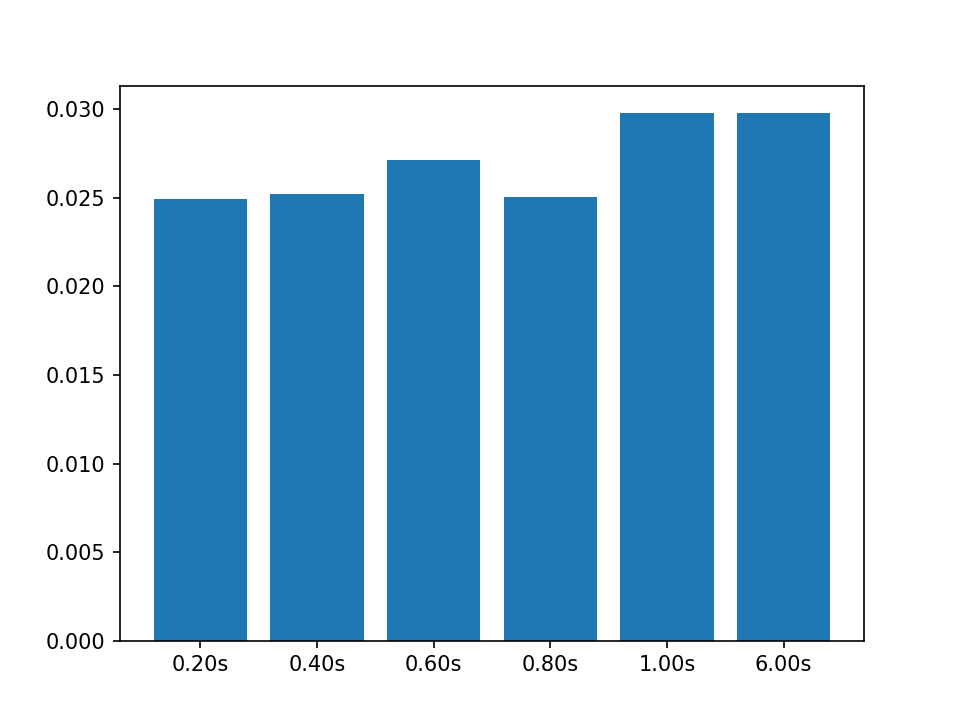

<BarContainer object of 6 artists>

In [9]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(rms(cycle_01.grip[:int(window)]))
    names.append("{0:0.2f}s".format(window_s))

data.append(rms(cycle_01.grip[:int(window)]))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

    
plt.bar(names, data)

Waveform Length
Waveform length is a measure of complexity of the EMG signal. It is defined as cumulative length of the EMG waveform over the time segment.

![Wave Formula](./wavelength_formula.png)

In [ ]:
import math

def waveformlen(sample):
    sum = 0
    for i in range(len(sample)-1):
        sum += math.fabs(sample[i+1] - sample[i])
    return sum

In [10]:
waveformlen(np.array(cycle_01.grip[:int(.2*extractor._freq)]))

3.0441391619407665

[3.0441391619407665, 6.253401098561423, 10.018518552072353, 11.9663951364319, 17.022296042432373, 17.022296042432373]


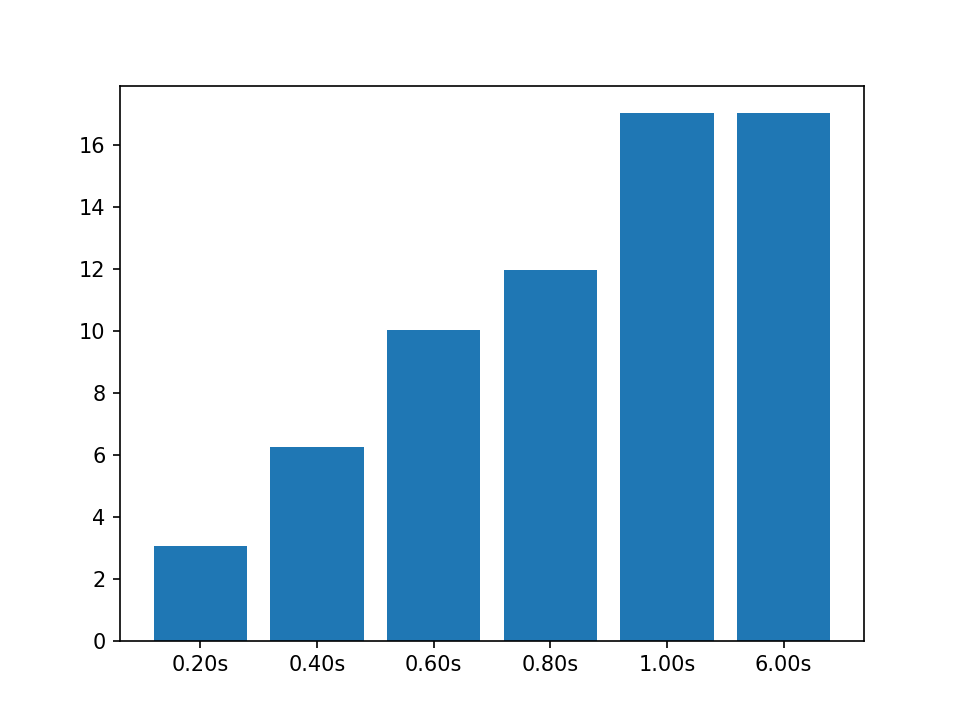

<BarContainer object of 6 artists>

In [11]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(waveformlen(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(waveformlen(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)
    
plt.bar(names, data)